# Using ChatGPT with Python

In [ ]:
!pip install openai

In this notebook you will learn how to use ChatGPT with Python for various tasks such as **text generation**, **speech-to-text**,  **text-to-speech**, and  **image generation**.

## Text Generation

OpenAI's text generation **models** (often called generative pre-trained transformers or large language models) have been trained to understand natural language, code, and images. The latest models, `gpt-4` and `gpt-3.5-turbo`, are accessed through the **chat completions API endpoint**.

> For an overview of the different models for text generation you can visit https://platform.openai.com/docs/guides/text-generation.

The models provide text outputs in response to  inputs given to them. The inputs to these models are also referred to as **"prompts"**. Designing a prompt is essentially how you “program” a large language model, usually by providing instructions or some examples of how to successfully complete a task.

To use one of these models via the OpenAI API, you can send a request containing the inputs and your API key, and receive a response containing the model's output.




### Chat Completions API

Chat models take a list of messages as input and return a model-generated message as output.

Before being able to use the Chat Completions API
endpoint we need to authenticate ourselves using the **API key**. You can find an API key which will work during this session in Canvas (in the course syllabus).



In [ ]:
import os
from pathlib import Path
from openai import OpenAI

os.environ['OPENAI_API_KEY'] = 'COPY THE API_KEY HERE'

client = OpenAI()

After successful authentication the Chat Completions API can be used. The API call has two required inputs:

* `model`: the name of the model you want to use (e.g., `gpt-3.5-turbo`, `gpt-4`)
* `messages`: a list of message objects, where each object has two required fields:
   * `role`: the role of the messenger (either system, user, or assistant)
   * `content`: the content of the message (e.g., Write me a beautiful poem)

Typically, a conversation will start with a system message that tells the assistant how to behave, followed by alternating user and assistant messages, but you are not required to follow this format.

While the **system message** helps set the behavior of the assistant, the **user messages** provide requests or comments for the assistant to respond to, and  **assistant messages** store previous assistant responses, but can also be written by you to give examples of desired behavior.


An example Chat Completions API call:

In [ ]:
#Example with a system message
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Explain generative AI to a 6 year old."},

  ]
)

The response format of a Chat Completion API response:

* `id:` the ID of the request
* `object: `the type of object returned (e.g., chat.completion)
* `created:` the timestamp of the request
* `model:` the full name of the model used to generate the response
* `usage:` the number of tokens used to generate the replies, counting prompt, completion, and total
* `choices: `a list of completion objects (only one, unless you set n greater than 1)
* `message:` the message object generated by the model, with role and content
* `finish_reason:` the reason the model stopped generating text (either stop, or length if max_tokens limit was reached)
* `index: `the index of the completion in the list of choices

We can extract the reply as follows:

In [ ]:
print(response.choices[0].message.content)

Generative AI is like a smart program that can create new things, like pictures or music. It learns from lots of examples and then uses what it learned to make something new. It's like having a really cool imagination that can draw or make sounds all by itself!


### Some Prompting Tipps

The next section provides some prompting tipps. For more details you can visit [here](https://github.com/openai/openai-cookbook/blob/main/examples/How_to_format_inputs_to_ChatGPT_models.ipynb).

#### System Messages

The system message can be used to prime the assistant with different personalities or behaviors.

System messages can be used for
*   defining roles
*   setting the tone
*   specifying the format



NOTE: Be aware that some models do not generally pay as much attention to the system message equally. For example, gpt-3.5-turbo-0301 does not generally pay as much attention to the system message as gpt-4-0314 or gpt-3.5-turbo-0613

In [ ]:
#System message defining the role
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a computer science teacher."},
    {"role": "user", "content": "Explain generative AI to a 6 year old."},
  ]
)

print(response.choices[0].message.content)

Generative AI is like having a computer that can imagine things that don't really exist. Just like you can draw a picture of a unicorn even though unicorns aren't real, generative AI can create things like art, music, or even stories that are made up by the computer's imagination. It's really cool because it can come up with new and creative things all on its own!


In [ ]:
#System message setting the tone
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a humorous AI. Your task is to write a fun, engaging article about hiking."},
  ]
)

print(response.choices[0].message.content)

Hiking: The Ultimate Exercise Adventure That's One Step Above Walking (Literally!)

Are you tired of your mundane routine and in desperate need of a breath of fresh air? Look no further than hiking! It's like walking, but for people who want to pretend they're adventurers conquering giant mountains instead of just going to the fridge (again) for another snack. So lace up those boots, grab your best backpack, and prepare to embark on an exhilarating and hilarious hiking expedition!

The best part about hiking is that you get to experience nature at its finest while simultaneously putting your body to the test. It's like multitasking, but without the boring spreadsheets or the pressure of answering your boss's emails. Just you, a trail, and possibly a squirrel plotting a takeover, because hey, who knows?

As a hiker, you'll quickly learn that the great outdoors is filled with unexpected surprises and obstacles that will keep you on your toes, quite literally. From dodging poison ivy to d

In [ ]:
#System message specifying the format
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a computer science teacher. Provide 1) a list of advantages of using generative AI followed by 2) a list of disadvantages and risk."},
  ]
)

print(response.choices[0].message.content)

Advantages of using generative AI:

1. Creativity and Innovation: Generative AI has the potential to assist in generating new and innovative ideas. It can generate unique content, designs, and concepts that may not have been thought of otherwise.

2. Time-saving: Generative AI can automate the process of creating content, thus saving a significant amount of time. It can quickly generate complex patterns or designs, which would normally require extensive human effort and time.

3. Personalization: Generative AI can be used to tailor content according to user preferences. It can generate personalized recommendations, advertisements, or suggestions based on individual interests and behaviors.

4. Scalability: With generative AI, it is possible to generate a large volume of content quickly and efficiently. This scalability enables organizations to meet high-demand requirements without compromising quality.

5. Exploration and Experimentation: Generative AI allows users to explore and exper

In [ ]:
#System message specifying the format
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a teacher teaching executive MBA students. 1) Explain what ML APIs such as Google Cloud Vision or Chat GPT are 2) Explain what open-source, off-the shelf pre-trained models are. 3) Compare the usage of ML APIs versus open-source, off-the shelf pretrained models."},
  ]
)

print(response.choices[0].message.content)

1) ML APIs, such as Google Cloud Vision or Chat GPT, are pre-built machine learning models that allow developers to add functionality to their applications without diving into the complexities of training and deploying ML models from scratch. These APIs provide a way to leverage the power of ML without requiring extensive knowledge or infrastructure.

For instance, Google Cloud Vision API is a service that analyzes and understands images. It can detect objects, interpret text within images, determine the sentiment of a person's face, and perform various image recognition tasks. On the other hand, OpenAI's Chat GPT API is a service that generates human-like text responses to a given prompt, enabling developers to integrate conversational agents into their applications or platforms.

These ML APIs offer a straightforward and accessible method for incorporating machine learning capabilities into applications, making it easier for developers to harness the power of ML without the need for 

#### Few-shot Prompting

In some cases, it's easier to show the model what you want rather than tell the model what you want.

One way to show the model what you want is with faked example messages.

In [ ]:
# An example of a faked few-shot conversation to prime the model into translating business jargon to simpler speech
# Example adapted from: https://github.com/openai/openai-cookbook/blob/main/examples/How_to_format_inputs_to_ChatGPT_models.ipynb

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful, pattern-following assistant."},
        {"role": "user", "content": "Help me translate the following corporate jargon into plain English."},
        {"role": "assistant", "content": "Sure, I'd be happy to!"},
        {"role": "user", "content": "New synergies will help drive top-line growth."},
        {"role": "assistant", "content": "Things working well together will increase revenue."},
        {"role": "user", "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage."},
        {"role": "assistant", "content": "Let's talk later when we're less busy about how to do better."},
        {"role": "user", "content": "This late pivot means we don't have time to boil the ocean for the client deliverable."},
    ],
    temperature=0,
)

print(response.choices[0].message.content)

This sudden change in direction means we don't have enough time to complete the entire project for the client.


To help clarify that the example messages are not part of a real conversation, and shouldn't be referred back to by the model, you can try setting the `name` field of `system` messages to `example_user` and `example_assistant`.


In [ ]:
# The business jargon translation example, but with example names for the example messages
# Example adapted from: https://github.com/openai/openai-cookbook/blob/main/examples/How_to_format_inputs_to_ChatGPT_models.ipynb

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful, pattern-following assistant that translates corporate jargon into plain English."},
        {"role": "system", "name":"example_user", "content": "New synergies will help drive top-line growth."},
        {"role": "system", "name": "example_assistant", "content": "Things working well together will increase revenue."},
        {"role": "system", "name":"example_user", "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage."},
        {"role": "system", "name": "example_assistant", "content": "Let's talk later when we're less busy about how to do better."},
        {"role": "user", "content": "This late pivot means we don't have time to boil the ocean for the client deliverable."},
    ],
    temperature=0,
)

print(response.choices[0].message.content)

This sudden change in direction means we don't have enough time to complete the entire project for the client.


In [ ]:
# description: classify titles into categories

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a helpful, pattern-following assistant that classifies titles into categories."},
        {"role": "system", "name": "example_user", "content": "Paris auf der Saslong nicht zu biegen"},
        {"role": "system", "name":"example_assistant", "content": "Ski Alpin"},
        {"role": "system", "name":"example_user", "content": "Kobayashi geht in Führung"},
        {"role": "system", "name":"example_assistant", "content": "Skispringen"},
        {"role": "system", "name": "example_user", "content": "Hütter fährt in Abfahrt aufs Podest"},
        {"role": "system", "name":"example_assistant", "content": "Ski Alpin"},
        {"role": "system", "name": "example_user", "content": "Schweizer Freudentag: Flury brilliert vor Hählen"},
        {"role": "system", "name":"example_assistant", "content": "Ski Alpin"},
        {"role": "system", "name": "example_user", "content": ",Arsenal unterliegt Tottenham im Derby"},
        {"role": "system", "name":"example_assistant", "content": "Fussball"},
        {"role": "user", "content": "Seoanes Gladbach muss sich mit Remis begnügen"},
        #{"role": "user", "content": "Superadler Kraft: Endlich einmal gelbe Weihnachten"},

    ],

    temperature=0,
)

print(response.choices[0].message.content)


Fussball


### Using Chat Completions for Specific Tasks


#### Text Translation

In [ ]:
def translateFromEnglishToGerman(text):
  response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a sentence in English, and your task is to translate it into German."
    },
    {
      "role": "user",
      "content": text
    }
  ],
  temperature=0.7,
  )
  return response

In [ ]:
response = translateFromEnglishToGerman("My name is Barbara. What is yours?")

In [ ]:
response.choices[0].message.content

'Mein Name ist Barbara. Wie ist deiner?'

#### Using ChatGPT for Image Prompt Generation

In [ ]:
def createImagePrompt(text):
  response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "user", "content": text},
  ]
  )
  return response

In [ ]:
response = createImagePrompt("create 1 text to image prompt to create nice and cinematic mountain ranges")
generatedPrompt = response.choices[0].message.content
print(generatedPrompt)

Imagine standing on the edge of a lush green valley, surrounded by lofty peaks that stretch beyond the clouds. The sun begins its descent, casting a warm golden glow over the rugged mountain ranges. Wisps of mist embrace the towering peaks, adding an ethereal touch. In the distance, waterfalls cascade down moss-covered cliffs, their gentle roar soothing the soul. The air is crisp and invigorating, carrying with it the scent of pine and wildflowers. Amidst this cinematic landscape, envision a solitary mountain cabin perched on a tranquil lake, its reflection undisturbed by the gentle breeze. Capture the majesty and serenity of this scene in an artistic masterpiece of your choice.


## Text to Speech Generation

The Audio API provides a `speech` endpoint based on our TTS (text-to-speech) model. It comes with 6 built-in voices (`alloy`, `echo`, `fable`, `onyx`, `nova`, and `shimmer`) and can be used to:

* Narrate a written blog post
* Produce spoken audio in multiple languages
* Give real time audio output using streaming

To check out supported languages visit https://platform.openai.com/docs/guides/text-to-speech.

### Audio Generation Example

In [ ]:
def generateTextToSpeech(text):
  speech_file_path = "speech.mp3"
  response = client.audio.speech.create(
    model="tts-1",
    voice="alloy",
    input=text
  )

  response.stream_to_file(speech_file_path)
  return speech_file_path

In [ ]:
import IPython.display as ipd
fileName=generateTextToSpeech("Today is a wonderful day to build something people love!")
ipd.Audio(filename=fileName)

In the next code snippet there is a translation step into the target language (e.g., German) before the audio output is generated.

In [ ]:
# Here we create a whole simple pipeline starting from translation and then speech generation

response = translateFromEnglishToGerman("My name is Barbara. What is yours?")
translatedText = response.choices[0].message.content

fileName=generateTextToSpeech(translatedText)
ipd.Audio(filename=fileName)

<ipython-input-20-caec2bb514c1>:9: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  response.stream_to_file(speech_file_path)


## Speech to Text (Audio API)

The Audio API provides two speech to text endpoints, `transcriptions` and `translations`, based on our state-of-the-art open source large-v2 Whisper model. They can be used to:

* Transcribe audio into whatever language the audio is in.
* Translate and transcribe the audio into english.

File uploads are currently limited to 25 MB and the
following input file types are supported: `mp3`, `mp4`, `mpeg`, `mpga`, `m4a`, `wav`, and `webm`.

### Transcription Example

In [ ]:
def transcribeAudio(fileName):
  audio_file = open(fileName, "rb")
  transcript = client.audio.transcriptions.create(
    model="whisper-1",
    file=audio_file,
    response_format="text"
  )
  return transcript

You will now be asked to upload an .mp3 file which will then be transcribed.

To explore the transcription capabilities of the Audio API you can experiment with one of the news audio files available at https://www.srf.ch/audio/nachrichten.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Nachrichten_14-12-2023-1200.1702552983949.mp3 to Nachrichten_14-12-2023-1200.1702552983949.mp3


In [ ]:
# The file name which is passed as a parameter to the function transcribeAudio needs to correspond to the file you have uploaded
print(transcribeAudio("Nachrichten_14-12-2023-1200.1702552983949.mp3"))

Die Nachrichten von SRF um 12.00 Uhr mit Karin Britsch. Aktuell fahren keine Züge durch den Lötschberg-Basistunnel. Der Eisenbahntunnel zwischen den Kantonen Bern und Wallis ist gesperrt, weil in der Nacht auf heute wegen des vielen Regens Wasser in den Tunnel eingedrungen sei. Das teilt die BLS mit, die den Tunnel betreibt. Reisende zwischen Spiez und Visp müssen mit Ausfällenumleitungen und Verspätungen rechnen. An anderen Orten hat sich die Hochwasserlage in der Schweiz nach den intensiven Niederschlägen etwas entspannt. Teils steigen die Pegel aber weiter an. Insbesondere in der Westschweiz. Dort ist es am Südufer des Neuenburger Sees kritisch. Der Pegel des Bielersees im Kanton Bern bleibt derzeit auf hohem Niveau. In Basel ist der Pegel des Rheins hingegen leicht zurückgegangen. Zwei Entscheide aus dem Parlament. Besitzerinnen und Besitzer einer Zweitwohnung sollen den Eigenmietwert für diese Liegenschaft weiterhin versteuern müssen. Das hat der Ständerat beschlossen. Denn mit ei

Should German not be your mother tongue, then you can use the `translations` endpoint to transcribe the file into English.

In [ ]:
def transcribeAndTranslateAudio(fileName):
  audio_file = open(fileName, "rb")
  transcript = client.audio.translations.create(
    model="whisper-1",
    file=audio_file,
    response_format="text"
  )
  return transcript

In [ ]:
print(transcribeAndTranslateAudio("Nachrichten_14-12-2023-1200.1702552983949.mp3"))

The news from SRF at 12 o'clock with Karin Britsch. At the moment, no trains pass through the Lötschberg Basis Tunnel. The railway tunnel between the cantons of Bern and Wallis is closed because last night, due to the heavy rain, water entered the tunnel. This is reported by the BLS, which runs the tunnel. Travellers between Spiez and Visp have to expect delays due to failures. In other places, the high-water situation in Switzerland has relaxed a bit after the intense downpours. In some places, however, the levels continue to rise. Especially in West Switzerland. There, it is critical on the south bank of the Neuenburger See. The level of the Bielersee in the canton of Bern is currently at a high level. In Basel, on the other hand, the level of the Rhine has slightly receded. Two decisions from the parliament. Owners of a second apartment should continue to tax their own rental value for this property. This was decided by the standing council. Because with a reduction, tourism cantons

### Working with Audio Segments

By default, the Whisper API only supports files that are less than 25 MB. To work with larger audio files, you will you will need to break them into chunks.

One option is to use the **PyDub open source Python package** to split the audio.

In [ ]:
!pip install pydub

In [ ]:
# code adapted from: https://platform.openai.com/docs/guides/speech-to-text/longer-inputs

from pydub import AudioSegment

def segmentAudio(audioFile):
  song = AudioSegment.from_mp3(audioFile)
  # PyDub handles time in milliseconds
  two_minutes = 2 * 60 * 1000
  first_2_minutes = song[:two_minutes]
  first_2_minutes.export("TwoMinutes" + audioFile, format="mp3")
  return "TwoMinutes" + audioFile

You will be asked to upload a file to be transcribed.

To explore the segmentation capabilities of the Audio API you can experiment with one longer audio files such as https://www.srf.ch/audio/tagesgespraech.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tagesgespraech_01-12-2023-1300.1701434514698.mp3 to Tagesgespraech_01-12-2023-1300.1701434514698.mp3


We can then play the split audio file.

In [ ]:
# The file name which is passed as a parameter to the function transcribeAudio needs to correspond to the file you have uploaded
fileName = "Tagesgespraech_01-12-2023-1300.1701434514698.mp3"
twoMinuteFile = segmentAudio(fileName)
ipd.Audio(filename=twoMinuteFile)

.. and even translate it to another language.

In [ ]:
print(transcribeAndTranslateAudio(twoMinuteFile))

SRF Audio The daily conversation with Caroline Arn Beat Jans, you have been an official candidate for the SP for almost a week. Welcome to the daily conversation. Hello, thank you for the invitation. It's going to be an exciting election. How is it for you? Also exciting. This is an important moment in my life. The 13th of December might change my life a lot. Therefore, it is also an intense but very interesting time. We are here in Basel. You come straight from the town hall. Basel did not have a council for 50 years. A year ago, it almost worked. But then, the SP was not elected. How was it then? Can you remember? Yes, it was a big disappointment. Also a bit of a surprise. I was not prepared for this. As a representative of the Basel government, I had to give many interviews. I did not want to disappoint the SP. But you could see that there was a big disappointment in the region. Were you in Bern? I was also in Bern with the entire government. We observed this and were very hopeful t

To experiment a bit more with Whisper visit [here](https://github.com/openai/openai-cookbook/blob/main/examples/Whisper_processing_guide.ipynb). Moreover, if you want to learn more on prompting with Whisper visit [here](https://github.com/openai/openai-cookbook/blob/main/examples/Whisper_prompting_guide.ipynb).

## Image Generation



The Images API provides three methods for interacting with images:

* Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
* Creating variations of an existing image (DALL·E 2 only)
* Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)


The image generations endpoint allows you to create an original image given a text prompt. When using DALL·E 3, images can have a size of 1024x1024, 1024x1792 or 1792x1024 pixels.

By default, images are generated at `standard` quality, but when using DALL·E 3 you can set quality: "`hd`" for enhanced detail. Square, standard quality images are the fastest to generate.

You can request 1 image at a time with DALL·E 3 (request more by making parallel requests) or up to 10 images at a time using DALL·E 2 with the n parameter.

### Creating images based on a text prompt

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.images.generate(
  model="dall-e-3",
  prompt="a downhill skier in the swiss alps",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

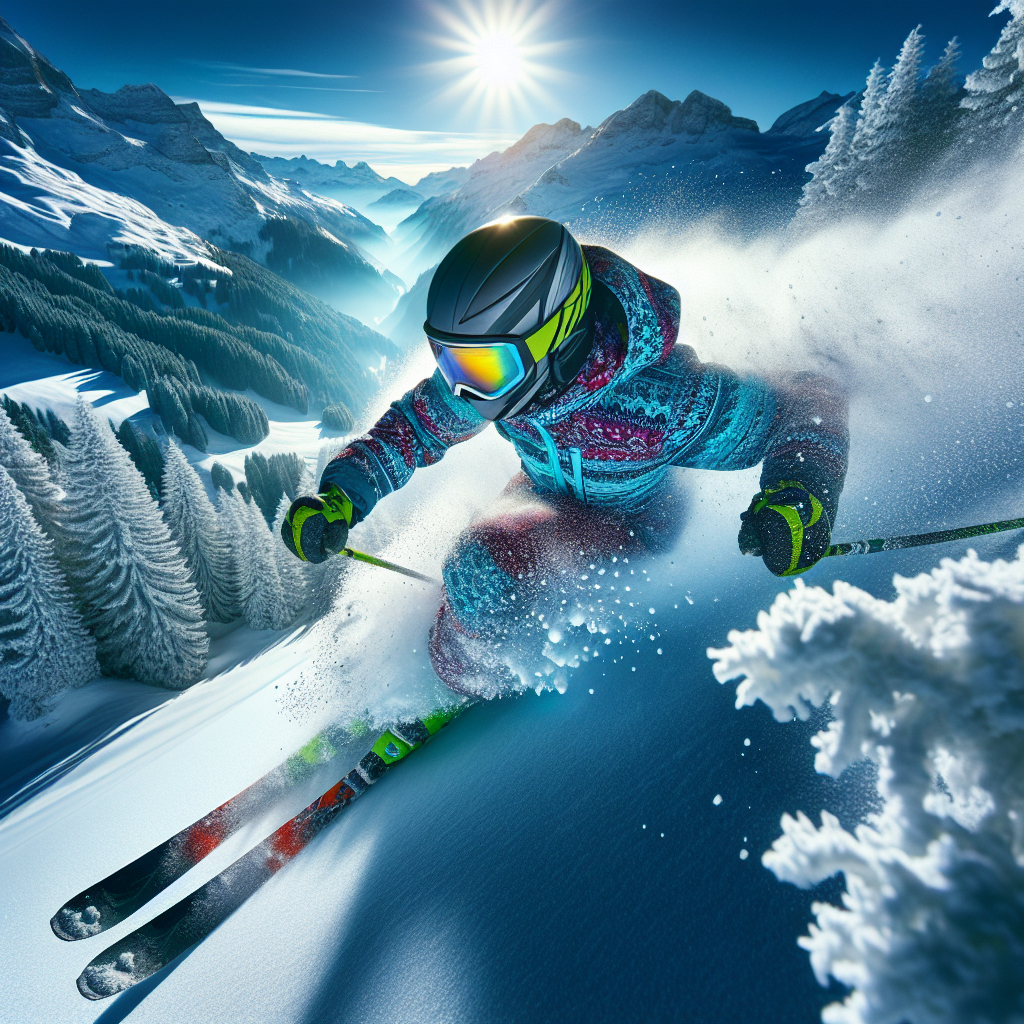

In [ ]:
# Here we take the URL created previously and open the image
from PIL import Image
import urllib.request

with urllib.request.urlopen(image_url) as url:
    img=Image.open(url)
    display(img)

In [ ]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
#print(f"{image_dir=}")

image_dir='./images'


In [ ]:
# save the image
import requests

def saveImageAs(generated_image_name):
  generated_image_filepath = os.path.join(image_dir, generated_image_name)
  generated_image_url = response.data[0].url  # extract image URL from response
  generated_image = requests.get(generated_image_url).content  # download the image

  with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

  return generated_image

In [ ]:
# any name you like; the filetype should be .png
generated_image = saveImageAs("generated_image.png")